# Predicting the Sale Price of cars using Machine Learning 🚗 💵

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling using Deep Neural Network 

## Problem Defition

> How well can we predict the future sale price of a car, given its characteristics and previous examples of how much similar car have been sold for using Dubizzle Platform?

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

## Data 

The sample dataset is taken from the [Kaggle](https://www.kaggle.com/datasets/alihassankp/dubizzle-used-car-sale-data). The dataset has 20 columns. It has 19  features to be used predicting the label which is price_in_aed column in the dataset. You can see the data dictionary [here](Data/README.md).

## Evaluation

> If we can reach less than XXXXXX at predicting 

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
⚠️ Note: Due to the nature of experimentation, the evaluation metric may change over time.
</div>

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="ticks")

# Preprocessing the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Linear Models from Scikit-Learn

# Non-linear Models from Scikit-Learn

# Ensemble Models from Scikit-Learn

# Model Evaluation

## Load Data

In [2]:
raw_data = pd.read_csv('Data/data.csv')
raw_data.shape # rows and columns

(9970, 20)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9911 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

## 📈 Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

To answer the above questions, we'll perform univariate, bivariate and multivariate analysis.

In [4]:
# Keeping the original dataset aside just in case
df = raw_data.copy()
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [5]:
df.tail()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
9965,AED7525month | 2015 Land Rover Range Rover Aut...,"215,000",105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,"90,000",55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,"679,000",100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,"18,900",140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022
9969,LOW MILEAGE! PERFECT CONDITION! Jeep Wrangler ...,"77,700",86000,Perfect inside and out,Perfect inside and out,Dealer,Crossover,6,Manual Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2013.0,Orange,Dubai,Sahara,jeep,wrangler,04/12/2021


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> 
    <ul>
        <li><code>title</code> column is not relevant, so it should be removed.</li>
        <li>The data type of <code>price_in_aed</code> is <code>object</code>, it should be converted into <code>int</code>.</li>
        <li>The same applies for <code>no_of_cylinders</code>.</li>
        <li><code>year</code> should be <code>int</code> not <code>float64</code>.</li>
        <li>I would keep <code>date_posted</code> if we were predicting how much time it would take to sell car, but it's a problem for some other time.</li>
    </ul>
</div>

In [6]:
df.drop(['title', 'date_posted'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_in_aed          9970 non-null   object 
 1   kilometers            9970 non-null   int64  
 2   body_condition        9970 non-null   object 
 3   mechanical_condition  9970 non-null   object 
 4   seller_type           9970 non-null   object 
 5   body_type             9970 non-null   object 
 6   no_of_cylinders       9911 non-null   object 
 7   transmission_type     9970 non-null   object 
 8   regional_specs        9970 non-null   object 
 9   horsepower            9970 non-null   object 
 10  fuel_type             9970 non-null   object 
 11  steering_side         9970 non-null   object 
 12  year                  9000 non-null   float64
 13  color                 9970 non-null   object 
 14  emirate               9970 non-null   object 
 15  motors_trim          

In [8]:
df['price_in_aed'] = df['price_in_aed'].str.replace(',', '').astype(int)

In [11]:
def dist_plot(feature):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15, 0.85)})
    
    sb.boxplot(data=df, x=feature, color='lightblue', ax=ax_box)
    ax_box.set_title(feature.replace('_', ' '), fontsize=16)
    ax_box.set_xlabel('')
    
    sb.histplot(data=df, x=feature, kde=True, ax=ax_hist)
    
    plt.tight_layout()
    plt.show()

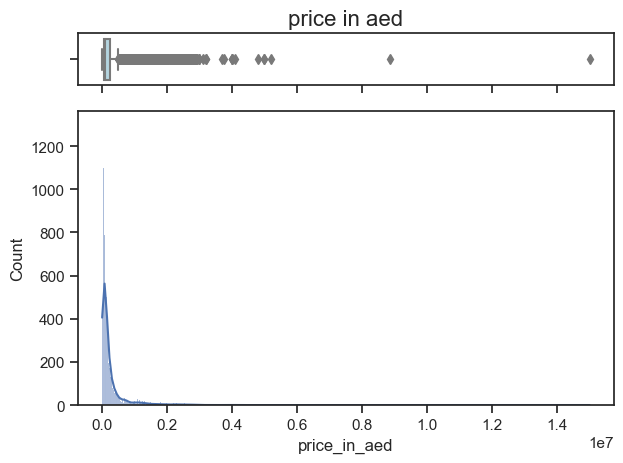

In [12]:
dist_plot('price_in_aed')

In [13]:
print(f"Skewness: {df['price_in_aed'].skew()}")
print(f"Kurtosis: {df['price_in_aed'].kurt()}")

Skewness: 7.3522102789852815
Kurtosis: 140.41266824746788


In [7]:
df['year'] = df['year'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer